<a href="https://colab.research.google.com/github/evarahma61/clustering-diabetes-data/blob/main/18102011_Eva_Rahma_Indriyani_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Clustering Diabetes Data with K-Medoids <br>
<h5> Nama : Eva Rahma Indriyani <br>
<h5> Kelas : SC1 <br>
<h5> NIM   : 18102011

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#ambil data
data= pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Bagian data : 
[[148.     72.     35.    ...   0.627  50.      1.   ]
 [ 85.     66.     29.    ...   0.351  31.      0.   ]
 [183.     64.      0.    ...   0.672  32.      1.   ]
 ...
 [121.     72.     23.    ...   0.245  30.      0.   ]
 [126.     60.      0.    ...   0.349  47.      1.   ]
 [ 93.     70.     31.    ...   0.315  23.      0.   ]]


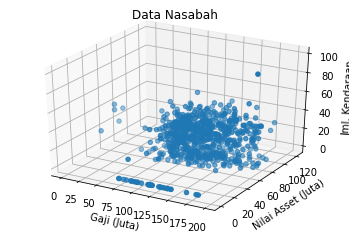

In [ ]:
# MENAMPILKAN DATA SECARA VISUAL DALAM VECTOR SPACE

#Ambil bagian data dari dataset
X = np.array(data.iloc[:, 1:9])  #mengambil semua baris, khusus mulai kolom ke-1 dari 4 kolom
print("Bagian data : ")
print(X)

#Membuat grafik data
# 1. Memindah tiap kolom data ke variabel grafik
x1 = np.array(data.iloc[:, 1])
x2 = np.array(data.iloc[:, 2])
x3 = np.array(data.iloc[:, 3])


#2. menyiapkan grafik data
ax = plt.axes(projection ='3d')
#ax adalah objek 3d yang akan ditaruh di grafik data

# 3. Mendefining axes
ax.set_xlabel('Gaji (Juta)')
ax.set_ylabel('Nilai Asset (Juta)')
ax.set_zlabel('Jml. Kendaraan')
ax.scatter(x1, x2, x3)
#data x,y, dan z ditempelkan di objek ax

# 4. Menampilkan grafik
plt.title('Data Nasabah')
plt.show()

# Clustering K-Means


In [ ]:
#ambil data
data= pd.read_csv('diabetes.csv')
print(data)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [ ]:
# Preprocessing: Normalisasi data dengan Min Max Scaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[0.74371859, 0.59016393, 0.35353535, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.42713568, 0.54098361, 0.29292929, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.91959799, 0.52459016, 0.        , ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.6080402 , 0.59016393, 0.23232323, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.63316583, 0.49180328, 0.        , ..., 0.11571307, 0.43333333,
        1.        ],
       [0.46733668, 0.57377049, 0.31313131, ..., 0.10119556, 0.03333333,
        0.        ]])

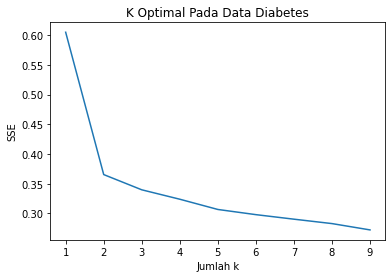

In [ ]:
# menentukan jumlah k terbaik
SSE = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x_scaled) # membuat model k-means
    kmeanModel.fit(x_scaled) # kerjakan klastering
    SSE.append(sum(np.min(cdist(x_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Menggambar elbow
plt.plot(K, SSE, '-')
plt.xlabel('Jumlah k')
plt.ylabel('SSE')
plt.title('K Optimal Pada Data Diabetes')
plt.show()

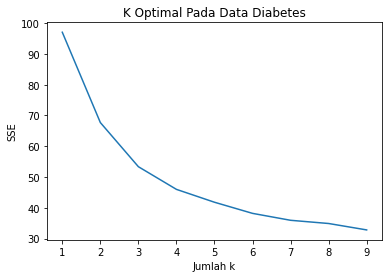

In [ ]:
# menentukan jumlah k terbaik
SSE = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X) # membuat model k-means
    kmeanModel.fit(X) # kerjakan klastering
    SSE.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Menggambar elbow
plt.plot(K, SSE, '-')
plt.xlabel('Jumlah k')
plt.ylabel('SSE')
plt.title('K Optimal Pada Data Diabetes')
plt.show()

In [ ]:
# Membuat model K-means
model = KMeans(n_clusters=3, random_state=42).fit(x_scaled)
# Menampilkan Pusat cluetering
print(model.cluster_centers_)

[[ 5.35496632e-01  5.37168643e-01  2.11610789e-01  9.21671445e-02
   4.47157307e-01  1.49734497e-01  7.58865248e-02  1.60982339e-15]
 [ 7.09836496e-01  5.80529728e-01  2.23880597e-01  1.18600261e-01
   5.23733790e-01  2.01750640e-01  2.67786070e-01  1.00000000e+00]
 [ 6.04717134e-01  6.24735590e-01  1.59253829e-01  4.84061618e-02
   4.65181962e-01  1.51552299e-01  4.54704301e-01 -2.77555756e-16]]


In [ ]:
#Memberi label klaster
data['klaster'] = model.labels_
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,klaster
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,2
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1


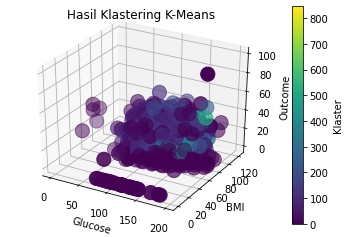

In [ ]:
#Menampilkan visual cluster

# 1. Memindah tiap kolom data ke variabel grafik
x1 = np.array(data.iloc[:, 1])
x2 = np.array(data.iloc[:, 2])
x3 = np.array(data.iloc[:, 3])
klaster = np.array(data.iloc[:,4])

ax = plt.axes(projection ='3d')
sc=ax.scatter(x1, x2, x3,  s=200,  c = klaster, cmap='viridis')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Outcome')
cbar = plt.colorbar(sc)
cbar.set_label("Klaster")
plt.title('Hasil Klastering K-Means')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f65e9626fd0>,
                     model=None)

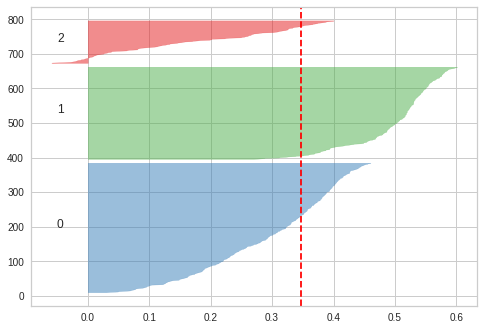

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
kmmodel = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(kmmodel, colors='yellowbrick')
visualizer.fit(x_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f65e9551650>,
                     model=None)

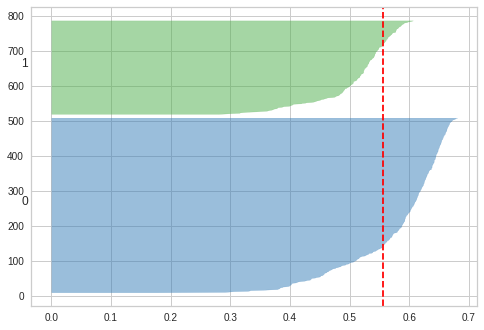

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
kmmodel = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(kmmodel, colors='yellowbrick')
visualizer.fit(x_scaled)

In [ ]:
#baca data
data_db = pd.read_csv('diabetes.csv')
data_db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#ambil variabel 
db_X = np.array(data_db.iloc[:, :9])
db_X

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

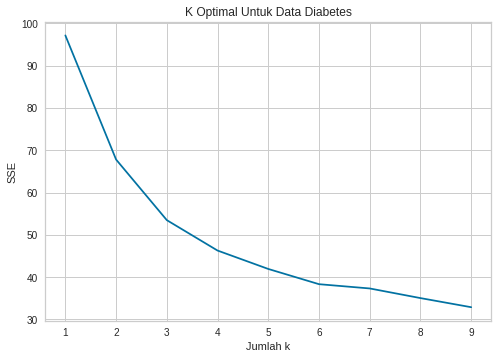

In [ ]:
# menentukan jumlah k terbaik

distortions = []
K = range(1,10)
for k in K:
    km_db = KMeans(n_clusters=k).fit(db_X) # membuat model k-means
    km_db.fit(db_X) # kerjakan klastering
    distortions.append(sum(np.min(cdist(db_X, km_db.cluster_centers_, 'euclidean'), axis=1)) / db_X.shape[0])

# Menggambar elbow
plt.plot(K, distortions, '-')
plt.xlabel('Jumlah k')
plt.ylabel('SSE')
plt.title('K Optimal Untuk Data Diabetes')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5687788342658853
For n_clusters = 3 The average silhouette_score is : 0.5104110277535746
For n_clusters = 4 The average silhouette_score is : 0.425132687194581
For n_clusters = 5 The average silhouette_score is : 0.3953509674340124


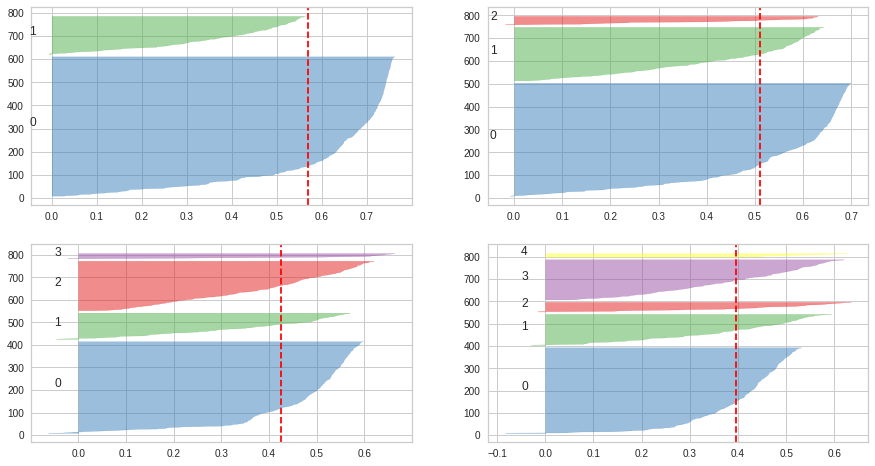

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2,3,4,5]:
    km_db = KMeans(n_clusters=k, random_state=42)
    q, mod = divmod(k, 2)
    cluster_labels = km_db.fit_predict(db_X)
    visualizer = SilhouetteVisualizer(km_db, colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(db_X)
    silhouette_avg = silhouette_score(db_X, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

# CLUSTERING MENGGUNAKAN K-MEDOIDS DAN VALIDASI SILHOUTTE

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7MB 4.2MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn_extra.cluster import KMedoids

For n_clusters = 2 The average silhouette_score is : 0.49678126043268983
For n_clusters = 3 The average silhouette_score is : 0.3683408048361236
For n_clusters = 4 The average silhouette_score is : 0.29789657459790675
For n_clusters = 5 The average silhouette_score is : 0.2563699226204772


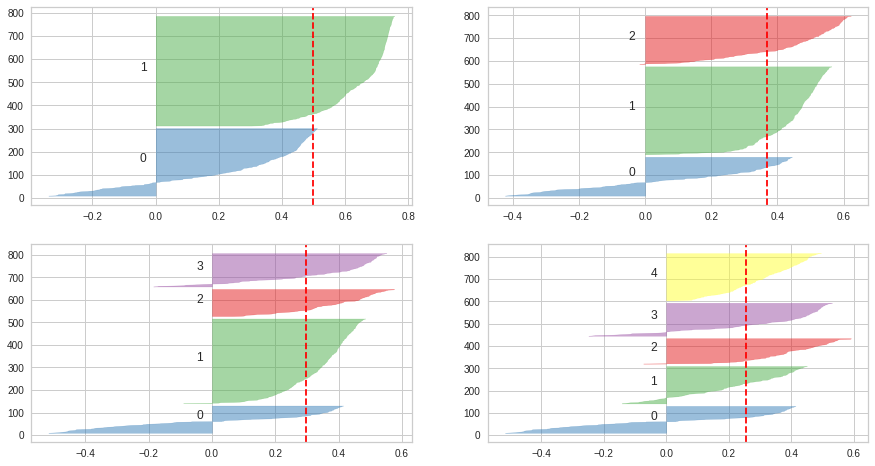

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2,3,4,5]:
    kmd_db =KMedoids(n_clusters=k, random_state=0)
    q, mod = divmod(k, 2)
    cluster_labels = kmd_db.fit_predict(db_X)
    visualizer = SilhouetteVisualizer(kmd_db, colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(db_X)
    silhouette_avg = silhouette_score(db_X, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)